# Show behavior predictions for specific neural models

In [1]:
%matplotlib inline
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from scipy.ndimage import gaussian_filter1d as smooth
from sklearn import linear_model
import sys

from disp import set_plot
from my_torch import skl_fit_ridge

cc = np.concatenate

STRAINS = ['NM91', 'ZH23']
PTRAIN = .8
NSPLIT = 30

FIT_LIN = skl_fit_ridge

ALPHA = 10

FPS = 30.03

In [2]:
FSTRAIN = 'data/simple/strains.csv'

MSTRAINS = [(pd.read_csv(FSTRAIN)['STRAIN'] == strain) for strain in STRAINS]
MSTRAIN = np.any(MSTRAINS, axis=0)
ISTRAIN = MSTRAIN.nonzero()[0]

NTR = MSTRAIN.sum()
NTRAIN = int(round(PTRAIN*NTR))

# Population M-A model predicting FFV

In [3]:
TARG = 'FFV_MN_1'

# FSAVE = f'data/simple/mlv/lin_filter/rc_lin_{"_".join(STRAINS).lower()}_{TARG.lower()}_ridge_alpha_{ALPHA}.npy'
# FSAVE = f'data/simple/mlv/neur_basic/{"_".join(STRAINS).lower()}_{TARG.lower()}_from_time.npy'

LOAD_DIR = 'neur_basic'
# LOAD_DIR = 'dyn_alt'

# NRL_MDL = 'lin'  # linear neural model
# NRL_MDL = 'ln2e'  # linear-nonlinear model
NRL_MDL = 'ma'  # dynamical neural model
# NRL_MDL = 'ma_nonadapt'

FSAVE = f'data/simple/mlv/{LOAD_DIR}/baker_{NRL_MDL}_{"_".join(STRAINS).lower()}_{TARG.lower()}_ridge_alpha_{ALPHA}.npy'

### Smoothed FFV

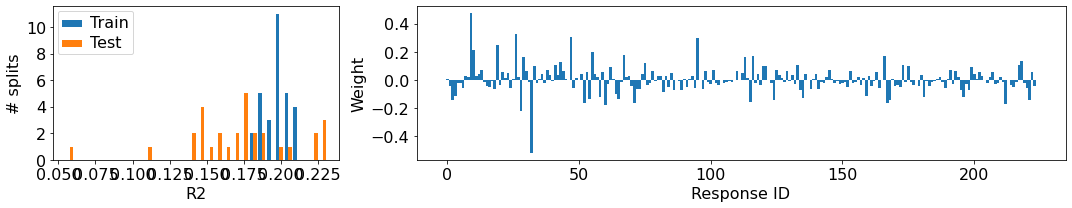

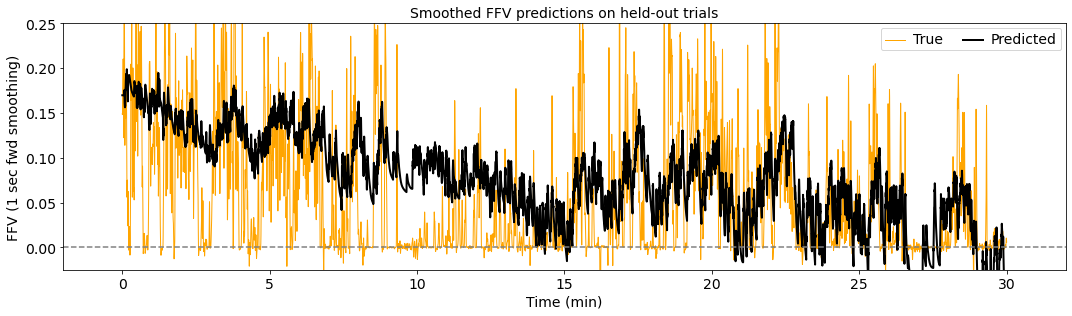

In [7]:
TARG_SHOW = 'FFV_MN_1'

data = np.load(FSAVE, allow_pickle=True)[0]

gs = gridspec.GridSpec(1, 3)

fig = plt.figure(figsize=(15, 3), tight_layout=True)
axs = [fig.add_subplot(gs[0, 0]), fig.add_subplot(gs[0, 1:])]

axs[0].hist(np.transpose([data['r2_train'][TARG_SHOW], data['r2_test'][TARG_SHOW]]), bins=30)
axs[0].legend(['Train', 'Test'])
set_plot(axs[0], x_label='R2', y_label='# splits', font_size=16)

axs[1].bar(np.arange(data['w'][TARG_SHOW].shape[1]), np.mean(data['w'][TARG_SHOW], axis=0), width=1)
set_plot(axs[1], x_label='Response ID', y_label='Weight', font_size=16)

ISPLIT = 0
TEST_ITRS = [9]

fig, ax = plt.subplots(1, 1, figsize=(15, 4.5), tight_layout=True)
t_offset = 0
t_spacing = 120

for itr in TEST_ITRS:
    y = smooth(data['ys_test'][TARG_SHOW][ISPLIT][itr], 10)
    y_hat = data['y_hats_test'][TARG_SHOW][ISPLIT][itr]
    t = np.arange(len(y))/FPS
    
    ax.plot((t + t_offset)/60, y, c='orange', lw=1)
    ax.plot((t + t_offset)/60, y_hat, c='k', lw=2)
    
#     ax.axvline(t_offset/60, lw=1, color='g', ls='--')
    
    t_offset += t[-1] + t_spacing

ax.axhline(0, ls='--', color='gray')
ax.legend(['True', 'Predicted'], ncol=2)
set_plot(ax, x_lim=(-t_spacing/60, t_offset/60), y_lim=(-.025, 0.25), x_label='Time (min)', y_label='FFV (1 sec fwd smoothing)', title='Smoothed FFV predictions on held-out trials', font_size=14)

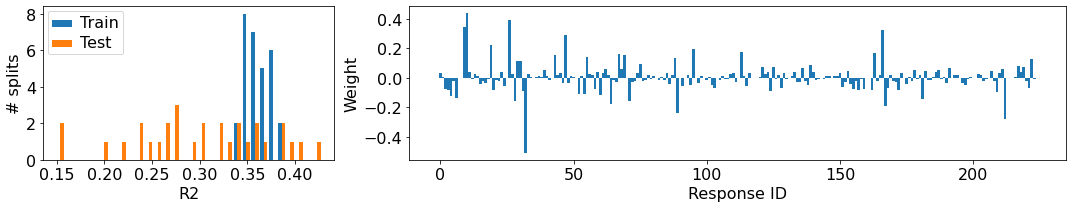

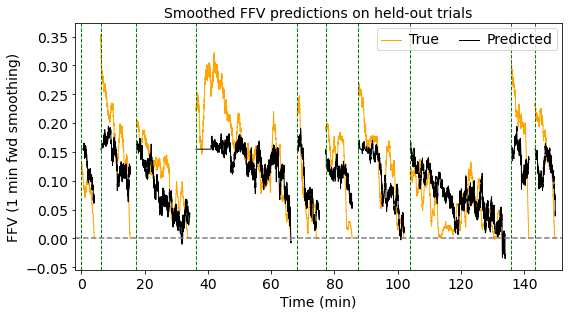

In [4]:
TARG_SHOW = 'FFV_MN_60'

data = np.load(FSAVE, allow_pickle=True)[0]

gs = gridspec.GridSpec(1, 3)

fig = plt.figure(figsize=(15, 3), tight_layout=True)
axs = [fig.add_subplot(gs[0, 0]), fig.add_subplot(gs[0, 1:])]

axs[0].hist(np.transpose([data['r2_train'][TARG_SHOW], data['r2_test'][TARG_SHOW]]), bins=30)
axs[0].legend(['Train', 'Test'])
set_plot(axs[0], x_label='R2', y_label='# splits', font_size=16)

axs[1].bar(np.arange(data['w'][TARG_SHOW].shape[1]), np.mean(data['w'][TARG_SHOW], axis=0), width=1)
set_plot(axs[1], x_label='Response ID', y_label='Weight', font_size=16)

ISPLIT = 0
TEST_ITRS = [0, 3, 4, 5, 6, 7, 8, 9, 13, 15]

fig, ax = plt.subplots(1, 1, figsize=(8, 4.5), tight_layout=True)
t_offset = 0
t_spacing = 120

for itr in TEST_ITRS:
    y = data['ys_test'][TARG_SHOW][ISPLIT][itr]
    y_hat = data['y_hats_test'][TARG_SHOW][ISPLIT][itr]
    t = np.arange(len(y))/FPS
    
    ax.plot((t + t_offset)/60, y, c='orange', lw=1)
    ax.plot((t + t_offset)/60, y_hat, c='k', lw=1)
    
    ax.axvline(t_offset/60, lw=1, color='g', ls='--')
    
    t_offset += t[-1] + t_spacing

ax.axhline(0, ls='--', color='gray')
ax.legend(['True', 'Predicted'], ncol=2)
set_plot(ax, x_lim=(-t_spacing/60, t_offset/60), x_label='Time (min)', y_label='FFV (1 min fwd smoothing)', title='Smoothed FFV predictions on held-out trials', font_size=14)
fig.savefig('ms/fig2c.svg')

# Population M-A model predicting FFV

In [25]:
TARG = 'FFV_MN_1'

# FSAVE = f'data/simple/mlv/lin_filter/rc_lin_{"_".join(STRAINS).lower()}_{TARG.lower()}_ridge_alpha_{ALPHA}.npy'
# FSAVE = f'data/simple/mlv/neur_basic/{"_".join(STRAINS).lower()}_{TARG.lower()}_from_time.npy'

LOAD_DIR = 'neur_basic'
# LOAD_DIR = 'dyn_alt'

# NRL_MDL = 'lin'  # linear neural model
# NRL_MDL = 'ln2e'  # linear-nonlinear model
NRL_MDL = 'maqsrb'  # dynamical neural model
# NRL_MDL = 'ma'  # dynamical neural model
# NRL_MDL = 'ma_nonadapt'

FSAVE = f'data/simple/mlv/{LOAD_DIR}/baker_{NRL_MDL}_{"_".join(STRAINS).lower()}_{TARG.lower()}_ridge_alpha_{ALPHA}.npy'

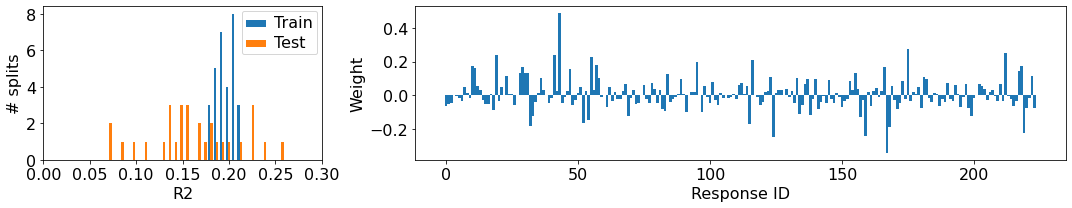

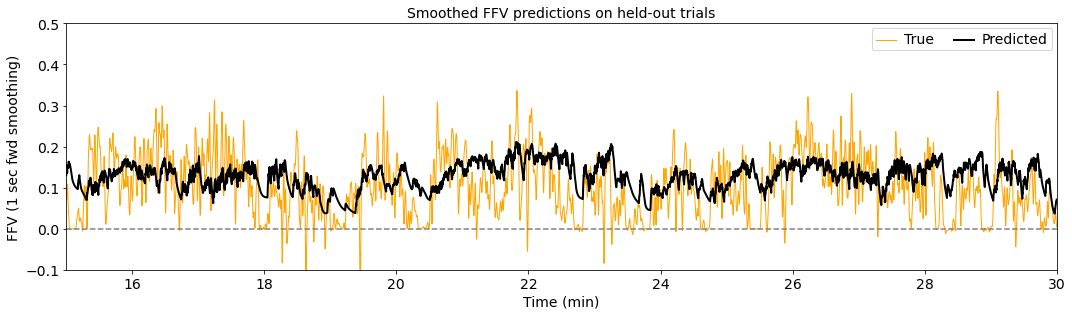

In [40]:
TARG_SHOW = 'FFV_MN_1'

data = np.load(FSAVE, allow_pickle=True)[0]

gs = gridspec.GridSpec(1, 3)

fig = plt.figure(figsize=(15, 3), tight_layout=True)
axs = [fig.add_subplot(gs[0, 0]), fig.add_subplot(gs[0, 1:])]

axs[0].hist(np.transpose([data['r2_train'][TARG_SHOW], data['r2_test'][TARG_SHOW]]), bins=30)
axs[0].legend(['Train', 'Test'])
set_plot(axs[0], x_ticks=[0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3], x_label='R2', y_label='# splits', font_size=16)

axs[1].bar(np.arange(data['w'][TARG_SHOW].shape[1]), np.mean(data['w'][TARG_SHOW], axis=0), width=1)
set_plot(axs[1], x_label='Response ID', y_label='Weight', font_size=16)

ISPLIT = 0
TEST_ITRS = [13]

fig, ax = plt.subplots(1, 1, figsize=(15, 4.5), tight_layout=True)
t_offset = 0
t_spacing = 120

for itr in TEST_ITRS:
    y = smooth(data['ys_test'][TARG_SHOW][ISPLIT][itr], 10)
    y_hat = data['y_hats_test'][TARG_SHOW][ISPLIT][itr]
    t = np.arange(len(y))/FPS
    
    ax.plot((t + t_offset)/60, y, c='orange', lw=1)
    ax.plot((t + t_offset)/60, y_hat, c='k', lw=2)
    
#     ax.axvline(t_offset/60, lw=1, color='g', ls='--')
    
    t_offset += t[-1] + t_spacing

ax.axhline(0, ls='--', color='gray')
ax.legend(['True', 'Predicted'], ncol=2)
# set_plot(ax, x_lim=(-t_spacing/60, t_offset/60), x_label='Time (min)', y_label='FFV (1 sec fwd smoothing)', title='Smoothed FFV predictions on held-out trials', font_size=14)
set_plot(ax, x_lim=(15, 30), y_lim=(-.1, .5), x_label='Time (min)', y_label='FFV (1 sec fwd smoothing)', title='Smoothed FFV predictions on held-out trials', font_size=14)

### Smoothed FFV

### Raw FFV

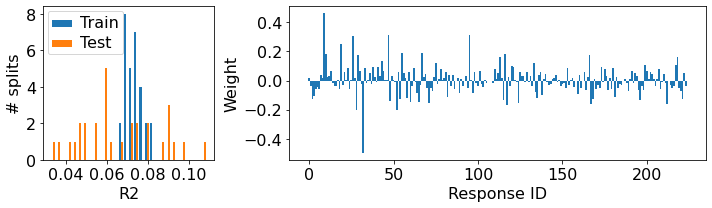

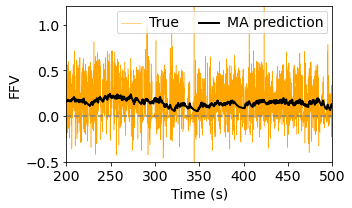

In [5]:
TARG_SHOW = 'FFV'

data = np.load(FSAVE, allow_pickle=True)[0]

gs = gridspec.GridSpec(1, 3)

fig = plt.figure(figsize=(10, 3), tight_layout=True)
axs = [fig.add_subplot(gs[0, 0]), fig.add_subplot(gs[0, 1:])]

axs[0].hist(np.transpose([data['r2_train'][TARG_SHOW], data['r2_test'][TARG_SHOW]]), bins=30)
axs[0].legend(['Train', 'Test'])
set_plot(axs[0], x_label='R2', y_label='# splits', font_size=16)

axs[1].bar(np.arange(data['w'][TARG_SHOW].shape[1]), np.mean(data['w'][TARG_SHOW], axis=0), width=1)
set_plot(axs[1], x_label='Response ID', y_label='Weight', font_size=16)

ISPLIT = 0
TEST_ITRS = [3]

fig, ax = plt.subplots(1, 1, figsize=(5, 3), tight_layout=True)
t_offset = 0
t_spacing = 120

for itr in TEST_ITRS:
    y = data['ys_test'][TARG_SHOW][ISPLIT][itr]
    y_hat = data['y_hats_test'][TARG_SHOW][ISPLIT][itr]
    t = np.arange(len(y))/FPS
    
    ax.plot((t + t_offset), y, c='orange', lw=.5)
    ax.plot((t + t_offset), y_hat, c='k', lw=2)
    
    t_offset += t[-1] + t_spacing

ax.axhline(0, ls='--', color='gray')
ax.legend(['True', 'MA prediction'], ncol=2)
set_plot(ax, x_lim=(200, 500), y_lim=(-.5, 1.2), y_ticks=[-.5, 0, .5, 1], x_label='Time (s)', y_label=TARG_SHOW, font_size=14)
fig.savefig('ms/fig1g_ma_prediction.svg')

### FFV smoothed at faster timescale

In [14]:
TARG = 'FFV_MN_1'

# FSAVE = f'data/simple/mlv/lin_filter/rc_lin_{"_".join(STRAINS).lower()}_{TARG.lower()}_ridge_alpha_{ALPHA}.npy'
# FSAVE = f'data/simple/mlv/neur_basic/{"_".join(STRAINS).lower()}_{TARG.lower()}_from_time.npy'

LOAD_DIR = 'neur_basic'
# LOAD_DIR = 'dyn_alt'

# NRL_MDL = 'lin'  # linear neural model
# NRL_MDL = 'ln2e'  # linear-nonlinear model
NRL_MDL = 'dyn'  # dynamical neural model
# NRL_MDL = 'dyn_nonadapt'

FSAVE = f'data/simple/mlv/{LOAD_DIR}/baker_{NRL_MDL}_{"_".join(STRAINS).lower()}_{TARG.lower()}_ridge_alpha_{ALPHA}.npy'

### Smoothed FFV

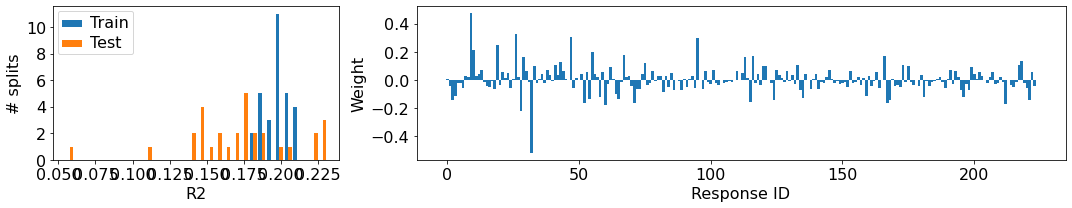

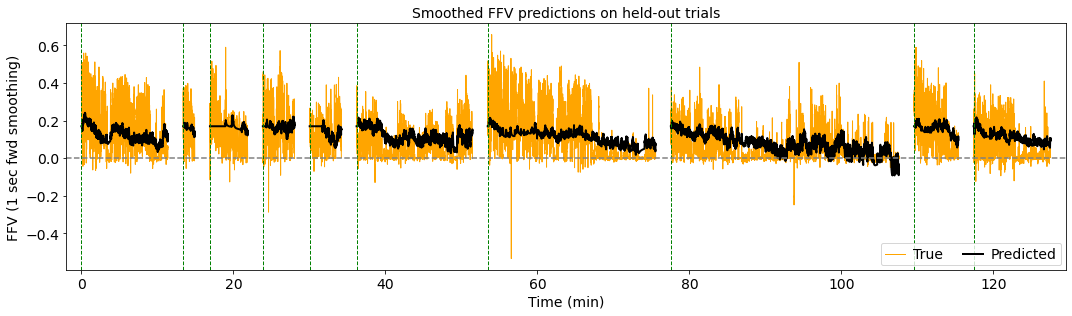

In [24]:
TARG_SHOW = 'FFV_MN_1'

data = np.load(FSAVE, allow_pickle=True)[0]

gs = gridspec.GridSpec(1, 3)

fig = plt.figure(figsize=(15, 3), tight_layout=True)
axs = [fig.add_subplot(gs[0, 0]), fig.add_subplot(gs[0, 1:])]

axs[0].hist(np.transpose([data['r2_train'][TARG_SHOW], data['r2_test'][TARG_SHOW]]), bins=30)
axs[0].legend(['Train', 'Test'])
set_plot(axs[0], x_label='R2', y_label='# splits', font_size=16)

axs[1].bar(np.arange(data['w'][TARG_SHOW].shape[1]), np.mean(data['w'][TARG_SHOW], axis=0), width=1)
set_plot(axs[1], x_label='Response ID', y_label='Weight', font_size=16)

ISPLIT = 0
# TEST_ITRS = [0, 7]
TEST_ITRS = [0, 3, 4, 5, 6, 7, 8, 9, 13, 15]

fig, ax = plt.subplots(1, 1, figsize=(15, 4.5), tight_layout=True)
t_offset = 0
t_spacing = 120

for itr in TEST_ITRS:
    y = data['ys_test'][TARG_SHOW][ISPLIT][itr]
    y_hat = data['y_hats_test'][TARG_SHOW][ISPLIT][itr]
    t = np.arange(len(y))/FPS
    
    ax.plot((t + t_offset)/60, y, c='orange', lw=1)
    ax.plot((t + t_offset)/60, y_hat, c='k', lw=2)
    
    ax.axvline(t_offset/60, lw=1, color='g', ls='--')
    
    t_offset += t[-1] + t_spacing

ax.axhline(0, ls='--', color='gray')
ax.legend(['True', 'Predicted'], ncol=2)
set_plot(ax, x_lim=(-t_spacing/60, t_offset/60), x_label='Time (min)', y_label='FFV (1 sec fwd smoothing)', title='Smoothed FFV predictions on held-out trials', font_size=14)

# Linear filter

In [25]:
TARG = 'FFV_MN_60'
FSAVE = f'data/simple/mlv/lin_filter/rc_lin_{"_".join(STRAINS).lower()}_{TARG.lower()}_ridge_alpha_{ALPHA}.npy'
# FSAVE = f'data/simple/mlv/neur_basic/{"_".join(STRAINS).lower()}_{TARG.lower()}_from_time.npy'

# LOAD_DIR = 'neur_basic'
# LOAD_DIR = 'dyn_alt'

# NRL_MDL = 'lin'  # linear neural model
# NRL_MDL = 'ln2e'  # linear-nonlinear model
# NRL_MDL = 'dyn'  # dynamical neural model
# NRL_MDL = 'dyn_nonadapt'

# FSAVE = f'data/simple/mlv/{LOAD_DIR}/baker_{NRL_MDL}_{"_".join(STRAINS).lower()}_{TARG.lower()}_ridge_alpha_{ALPHA}.npy'

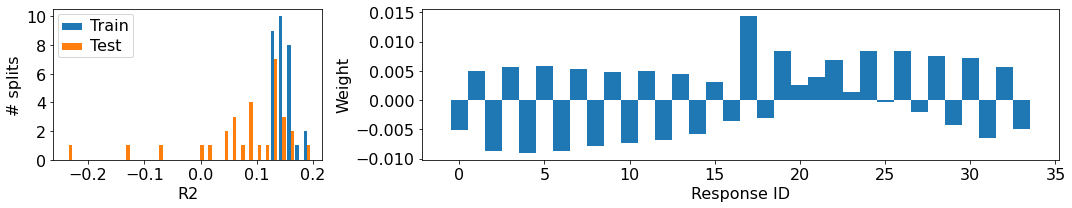

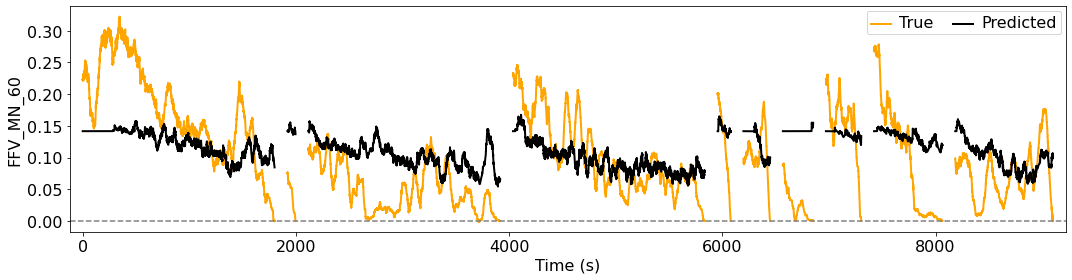

In [26]:
TARG_SHOW = 'FFV_MN_60'

data = np.load(FSAVE, allow_pickle=True)[0]

gs = gridspec.GridSpec(1, 3)

fig = plt.figure(figsize=(15, 3), tight_layout=True)
axs = [fig.add_subplot(gs[0, 0]), fig.add_subplot(gs[0, 1:])]

axs[0].hist(np.transpose([data['r2_train'][TARG_SHOW], data['r2_test'][TARG_SHOW]]), bins=30)
axs[0].legend(['Train', 'Test'])
set_plot(axs[0], x_label='R2', y_label='# splits', font_size=16)

axs[1].bar(np.arange(data['w'][TARG_SHOW].shape[1]), np.mean(data['w'][TARG_SHOW], axis=0), width=1)
set_plot(axs[1], x_label='Response ID', y_label='Weight', font_size=16)

ISPLIT = 0
TEST_ITRS = [0, 3, 4, 5, 6, 7, 8, 9, 13, 15]

fig, ax = plt.subplots(1, 1, figsize=(15, 4), tight_layout=True)
t_offset = 0
t_spacing = 120

for itr in TEST_ITRS:
    y = data['ys_test'][TARG_SHOW][ISPLIT][itr]
    y_hat = data['y_hats_test'][TARG_SHOW][ISPLIT][itr]
    t = np.arange(len(y))/FPS
    
    ax.plot(t + t_offset, y, c='orange', lw=2)
    ax.plot(t + t_offset, y_hat, c='k', lw=2)
    
    t_offset += t[-1] + t_spacing

ax.axhline(0, ls='--', color='gray')
ax.legend(['True', 'Predicted'], ncol=2)
set_plot(ax, x_lim=(-t_spacing, t_offset), x_label='Time (s)', y_label=TARG_SHOW, font_size=16)

# Elapsed time

In [27]:
# FSAVE = f'data/simple/mlv/lin_filter/rc_lin_{"_".join(STRAINS).lower()}_{TARG.lower()}_ridge_alpha_{ALPHA}.npy'
FSAVE = f'data/simple/mlv/neur_basic/{"_".join(STRAINS).lower()}_{TARG.lower()}_from_time.npy'

# LOAD_DIR = 'neur_basic'
# LOAD_DIR = 'dyn_alt'

# NRL_MDL = 'lin'  # linear neural model
# NRL_MDL = 'ln2e'  # linear-nonlinear model
# NRL_MDL = 'dyn'  # dynamical neural model
# NRL_MDL = 'dyn_nonadapt'

# FSAVE = f'data/simple/mlv/{LOAD_DIR}/baker_{NRL_MDL}_{"_".join(STRAINS).lower()}_{TARG.lower()}_ridge_alpha_{ALPHA}.npy'

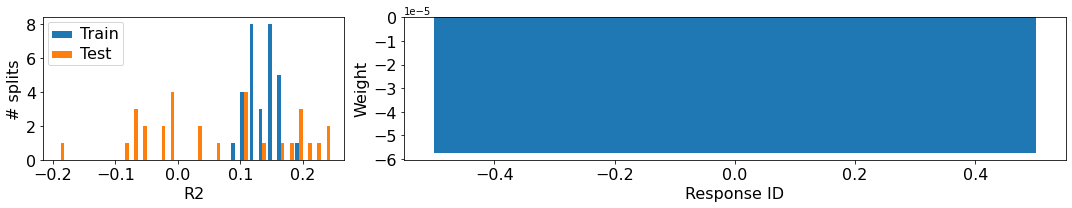

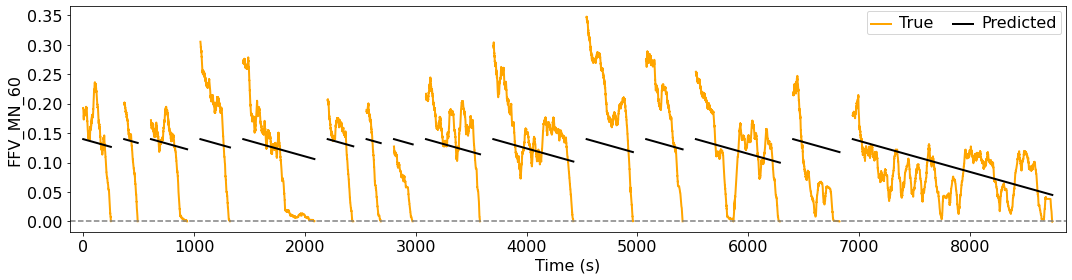

In [28]:
data = np.load(FSAVE, allow_pickle=True)[0]

gs = gridspec.GridSpec(1, 3)

fig = plt.figure(figsize=(15, 3), tight_layout=True)
axs = [fig.add_subplot(gs[0, 0]), fig.add_subplot(gs[0, 1:])]

axs[0].hist(np.transpose([data['r2_train'][TARG_SHOW], data['r2_test'][TARG_SHOW]]), bins=30)
axs[0].legend(['Train', 'Test'])
set_plot(axs[0], x_label='R2', y_label='# splits', font_size=16)

axs[1].bar(np.arange(data['w'][TARG_SHOW].shape[1]), np.mean(data['w'][TARG_SHOW], axis=0), width=1)
set_plot(axs[1], x_label='Response ID', y_label='Weight', font_size=16)

ISPLIT = 0
TEST_ITRS = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15]

fig, ax = plt.subplots(1, 1, figsize=(15, 4), tight_layout=True)
t_offset = 0
t_spacing = 120

for itr in TEST_ITRS:
    y = data['ys_test'][TARG_SHOW][ISPLIT][itr]
    y_hat = data['y_hats_test'][TARG_SHOW][ISPLIT][itr]
    t = np.arange(len(y))/FPS
    
    ax.plot(t + t_offset, y, c='orange', lw=2)
    ax.plot(t + t_offset, y_hat, c='k', lw=2)
    
    t_offset += t[-1] + t_spacing

ax.axhline(0, ls='--', color='gray')
ax.legend(['True', 'Predicted'], ncol=2)
set_plot(ax, x_lim=(-t_spacing, t_offset), x_label='Time (s)', y_label=TARG_SHOW, font_size=16)

# Non-adaptive population M-A model

In [29]:
# FSAVE = f'data/simple/mlv/lin_filter/rc_lin_{"_".join(STRAINS).lower()}_{TARG.lower()}_ridge_alpha_{ALPHA}.npy'
# FSAVE = f'data/simple/mlv/neur_basic/{"_".join(STRAINS).lower()}_{TARG.lower()}_from_time.npy'

# LOAD_DIR = 'neur_basic'
LOAD_DIR = 'dyn_alt'

# NRL_MDL = 'lin'  # linear neural model
# NRL_MDL = 'lnr'  # linear-nonlinear model
# NRL_MDL = 'dyn'  # dynamical neural model
NRL_MDL = 'dyn_nonadapt'

FSAVE = f'data/simple/mlv/{LOAD_DIR}/baker_{NRL_MDL}_{"_".join(STRAINS).lower()}_{TARG.lower()}_ridge_alpha_{ALPHA}.npy'

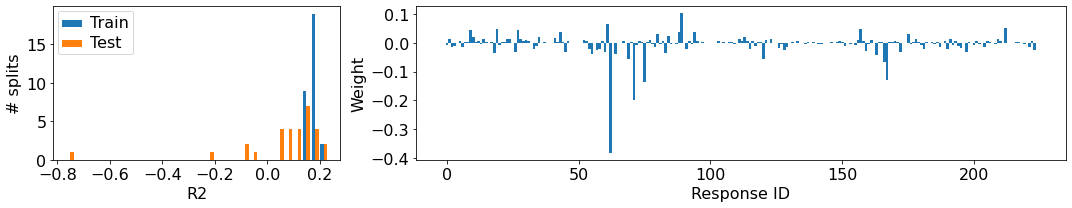

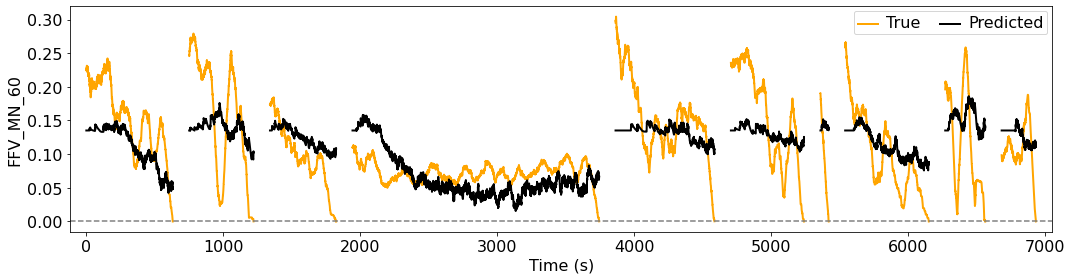

In [30]:
data = np.load(FSAVE, allow_pickle=True)[0]

gs = gridspec.GridSpec(1, 3)

fig = plt.figure(figsize=(15, 3), tight_layout=True)
axs = [fig.add_subplot(gs[0, 0]), fig.add_subplot(gs[0, 1:])]

axs[0].hist(np.transpose([data['r2_train'][TARG_SHOW], data['r2_test'][TARG_SHOW]]), bins=30)
axs[0].legend(['Train', 'Test'])
set_plot(axs[0], x_label='R2', y_label='# splits', font_size=16)

axs[1].bar(np.arange(data['w'][TARG_SHOW].shape[1]), np.mean(data['w'][TARG_SHOW], axis=0), width=1)
set_plot(axs[1], x_label='Response ID', y_label='Weight', font_size=16)

ISPLIT = 0
TEST_ITRS = [0, 3, 4, 5, 6, 7, 8, 9, 13, 15]

fig, ax = plt.subplots(1, 1, figsize=(15, 4), tight_layout=True)
t_offset = 0
t_spacing = 120

for itr in TEST_ITRS:
    y = data['ys_test'][TARG_SHOW][ISPLIT][itr]
    y_hat = data['y_hats_test'][TARG_SHOW][ISPLIT][itr]
    t = np.arange(len(y))/FPS
    
    ax.plot(t + t_offset, y, c='orange', lw=2)
    ax.plot(t + t_offset, y_hat, c='k', lw=2)
    
    t_offset += t[-1] + t_spacing

ax.axhline(0, ls='--', color='gray')
ax.legend(['True', 'Predicted'], ncol=2)
set_plot(ax, x_lim=(-t_spacing, t_offset), x_label='Time (s)', y_label=TARG_SHOW, font_size=16)

# Population L-N model (neural models fit with ridge regression)

In [79]:
TARG = 'FFV_MN_60'

# FSAVE = f'data/simple/mlv/lin_filter/rc_lin_{"_".join(STRAINS).lower()}_{TARG.lower()}_ridge_alpha_{ALPHA}.npy'
# FSAVE = f'data/simple/mlv/neur_basic/{"_".join(STRAINS).lower()}_{TARG.lower()}_from_time.npy'

LOAD_DIR = 'neur_basic'
# LOAD_DIR = 'dyn_alt'

# NRL_MDL = 'lin'  # linear neural model
NRL_MDL = 'ln2e'  # linear-nonlinear model
# NRL_MDL = 'dyn'  # dynamical neural model
# NRL_MDL = 'dyn_nonadapt'

FSAVE = f'data/simple/mlv/{LOAD_DIR}/baker_{NRL_MDL}_{"_".join(STRAINS).lower()}_{TARG.lower()}_ridge_alpha_{ALPHA}.npy'

### Smoothed FFV prediction

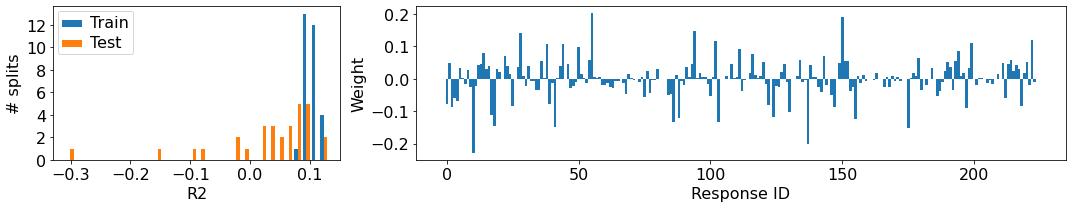

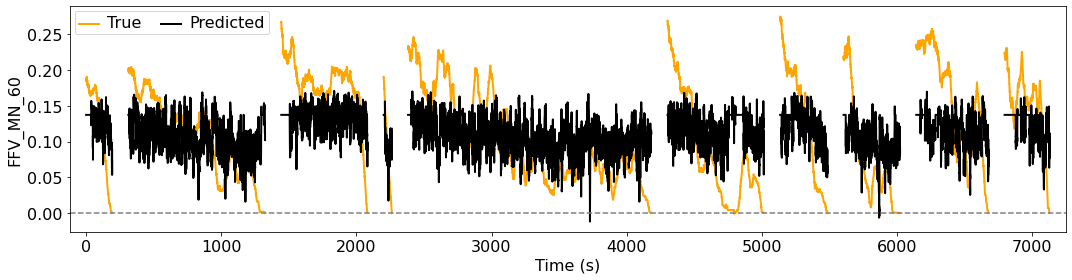

In [80]:
TARG_SHOW = 'FFV_MN_60'
data = np.load(FSAVE, allow_pickle=True)[0]

gs = gridspec.GridSpec(1, 3)

fig = plt.figure(figsize=(15, 3), tight_layout=True)
axs = [fig.add_subplot(gs[0, 0]), fig.add_subplot(gs[0, 1:])]

axs[0].hist(np.transpose([data['r2_train'][TARG_SHOW], data['r2_test'][TARG_SHOW]]), bins=30)
axs[0].legend(['Train', 'Test'])
set_plot(axs[0], x_label='R2', y_label='# splits', font_size=16)

axs[1].bar(np.arange(data['w'][TARG_SHOW].shape[1]), np.mean(data['w'][TARG_SHOW], axis=0), width=1)
set_plot(axs[1], x_label='Response ID', y_label='Weight', font_size=16)

ISPLIT = 0
TEST_ITRS = [0, 3, 4, 5, 6, 7, 8, 9, 13, 15]

fig, ax = plt.subplots(1, 1, figsize=(15, 4), tight_layout=True)
t_offset = 0
t_spacing = 120

for itr in TEST_ITRS:
    y = data['ys_test'][TARG_SHOW][ISPLIT][itr]
    y_hat = data['y_hats_test'][TARG_SHOW][ISPLIT][itr]
    t = np.arange(len(y))/FPS
    
    ax.plot(t + t_offset, y, c='orange', lw=2)
    ax.plot(t + t_offset, y_hat, c='k', lw=2)
    
    t_offset += t[-1] + t_spacing

ax.axhline(0, ls='--', color='gray')
ax.legend(['True', 'Predicted'], ncol=2)
set_plot(ax, x_lim=(-t_spacing, t_offset), x_label='Time (s)', y_label=TARG_SHOW, font_size=16)

### Raw FFV prediction

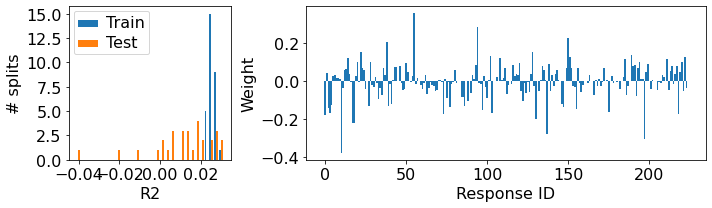

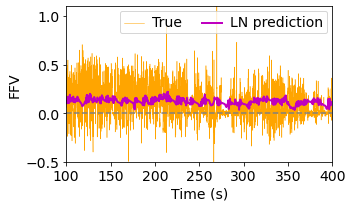

In [81]:
TARG_SHOW = 'FFV'
data = np.load(FSAVE, allow_pickle=True)[0]

gs = gridspec.GridSpec(1, 3)

fig = plt.figure(figsize=(10, 3), tight_layout=True)
axs = [fig.add_subplot(gs[0, 0]), fig.add_subplot(gs[0, 1:])]

axs[0].hist(np.transpose([data['r2_train'][TARG_SHOW], data['r2_test'][TARG_SHOW]]), bins=30)
axs[0].legend(['Train', 'Test'])
set_plot(axs[0], x_label='R2', y_label='# splits', font_size=16)

axs[1].bar(np.arange(data['w'][TARG_SHOW].shape[1]), np.mean(data['w'][TARG_SHOW], axis=0), width=1)
set_plot(axs[1], x_label='Response ID', y_label='Weight', font_size=16)

ISPLIT = 0
TEST_ITRS = [7]

fig, ax = plt.subplots(1, 1, figsize=(5, 3), tight_layout=True)
t_offset = 0
t_spacing = 120

for itr in TEST_ITRS:
    y = data['ys_test'][TARG_SHOW][ISPLIT][itr]
    y_hat = data['y_hats_test'][TARG_SHOW][ISPLIT][itr]
    t = np.arange(len(y))/FPS
    
    ax.plot(t + t_offset, y, c='orange', lw=.5)
    ax.plot(t + t_offset, y_hat, c='m', lw=2)
    
    t_offset += t[-1] + t_spacing

ax.axhline(0, ls='--', color='gray')
ax.legend(['True', 'LN prediction'], ncol=2)
set_plot(ax, x_lim=(100, 400), y_lim=(-.5, 1.1), y_ticks=[-.5, 0, .5, 1], x_label='Time (s)', y_label=TARG_SHOW, font_size=14)
fig.savefig('ms/fig1g_ln_prediction.svg')

# Fast adapting, slow decay M-A population

In [29]:
# FSAVE = f'data/simple/mlv/lin_filter/rc_lin_{"_".join(STRAINS).lower()}_{TARG.lower()}_ridge_alpha_{ALPHA}.npy'
# FSAVE = f'data/simple/mlv/neur_basic/{"_".join(STRAINS).lower()}_{TARG.lower()}_from_time.npy'

# LOAD_DIR = 'neur_basic'
LOAD_DIR = 'dyn_alt'

# NRL_MDL = 'lin'  # linear neural model
# NRL_MDL = 'lnr'  # linear-nonlinear model
# NRL_MDL = 'dyn'  # dynamical neural model
# NRL_MDL = 'dyn_nonadapt'
NRL_MDL = 'dyn_max_tau_a_1_tau_r_120'

FSAVE = f'data/simple/mlv/{LOAD_DIR}/baker_{NRL_MDL}_{"_".join(STRAINS).lower()}_{TARG.lower()}_ridge_alpha_{ALPHA}.npy'

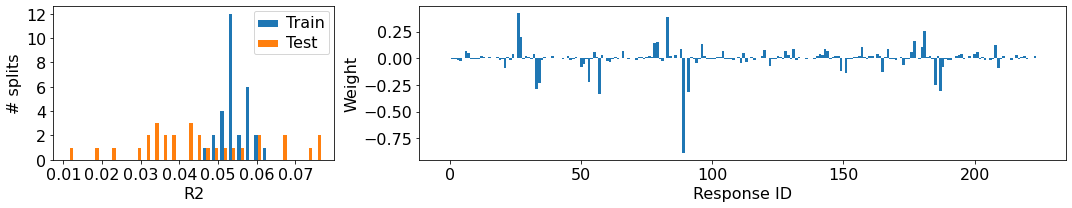

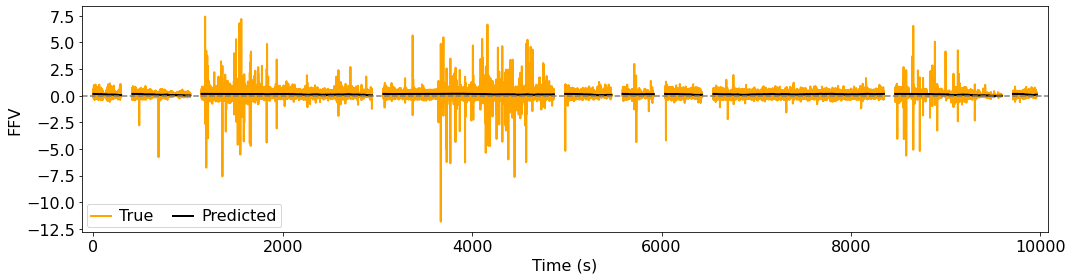

In [30]:
data = np.load(FSAVE, allow_pickle=True)[0]

gs = gridspec.GridSpec(1, 3)

fig = plt.figure(figsize=(15, 3), tight_layout=True)
axs = [fig.add_subplot(gs[0, 0]), fig.add_subplot(gs[0, 1:])]

axs[0].hist(np.transpose([data['r2_train'][TARG_SHOW], data['r2_test'][TARG_SHOW]]), bins=30)
axs[0].legend(['Train', 'Test'])
set_plot(axs[0], x_label='R2', y_label='# splits', font_size=16)

axs[1].bar(np.arange(data['w'][TARG_SHOW].shape[1]), np.mean(data['w'][TARG_SHOW], axis=0), width=1)
set_plot(axs[1], x_label='Response ID', y_label='Weight', font_size=16)

ISPLIT = 1
TEST_ITRS = [0, 3, 4, 5, 6, 7, 8, 9, 13, 15]

fig, ax = plt.subplots(1, 1, figsize=(15, 4), tight_layout=True)
t_offset = 0
t_spacing = 120

for itr in TEST_ITRS:
    y = data['ys_test'][TARG_SHOW][ISPLIT][itr]
    y_hat = data['y_hats_test'][TARG_SHOW][ISPLIT][itr]
    t = np.arange(len(y))/FPS
    
    ax.plot(t + t_offset, y, c='orange', lw=2)
    ax.plot(t + t_offset, y_hat, c='k', lw=2)
    
    t_offset += t[-1] + t_spacing

ax.axhline(0, ls='--', color='gray')
ax.legend(['True', 'Predicted'], ncol=2)
set_plot(ax, x_lim=(-t_spacing, t_offset), x_label='Time (s)', y_label=TARG_SHOW, font_size=16)

# 8-neuron fast adapting, slow decay

In [31]:
# FSAVE = f'data/simple/mlv/lin_filter/rc_lin_{"_".join(STRAINS).lower()}_{TARG.lower()}_ridge_alpha_{ALPHA}.npy'
# FSAVE = f'data/simple/mlv/neur_basic/{"_".join(STRAINS).lower()}_{TARG.lower()}_from_time.npy'

# LOAD_DIR = 'neur_basic'
# LOAD_DIR = 'dyn_alt'
LOAD_DIR = 'dyn_thry'

# NRL_MDL = 'lin'  # linear neural model
# NRL_MDL = 'lnr'  # linear-nonlinear model
# NRL_MDL = 'dyn'  # dynamical neural model
# NRL_MDL = 'dyn_nonadapt'
# NRL_MDL = 'dyn_fast_adapt_slow_decay_pulse_only'
NRL_MDL = 'dyn_fast_adapt_slow_decay'

FSAVE = f'data/simple/mlv/{LOAD_DIR}/{NRL_MDL}_{"_".join(STRAINS).lower()}_{TARG.lower()}_ridge_alpha_{ALPHA}.npy'

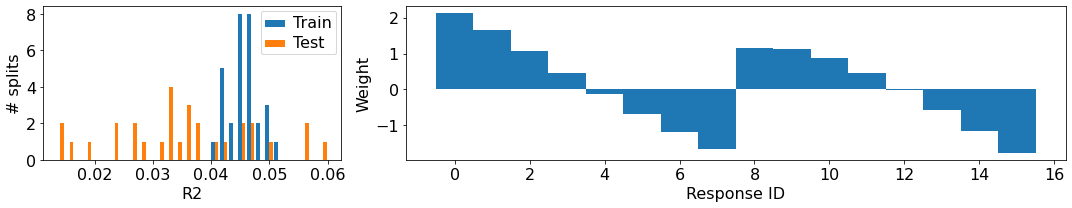

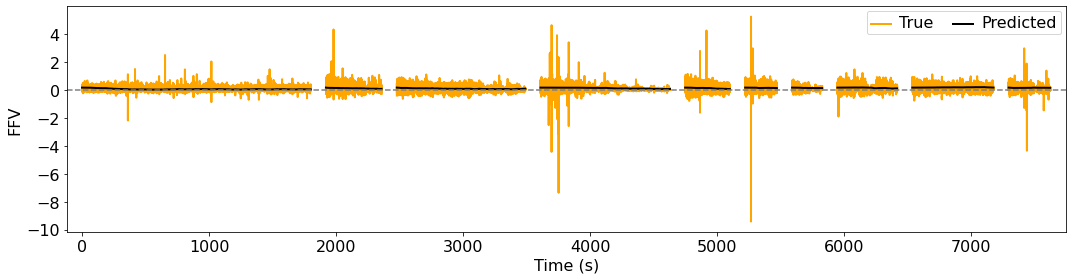

In [32]:
data = np.load(FSAVE, allow_pickle=True)[0]

gs = gridspec.GridSpec(1, 3)

fig = plt.figure(figsize=(15, 3), tight_layout=True)
axs = [fig.add_subplot(gs[0, 0]), fig.add_subplot(gs[0, 1:])]

axs[0].hist(np.transpose([data['r2_train'][TARG_SHOW], data['r2_test'][TARG_SHOW]]), bins=30)
axs[0].legend(['Train', 'Test'])
set_plot(axs[0], x_label='R2', y_label='# splits', font_size=16)

axs[1].bar(np.arange(data['w'][TARG_SHOW].shape[1]), np.mean(data['w'][TARG_SHOW], axis=0), width=1)
set_plot(axs[1], x_label='Response ID', y_label='Weight', font_size=16)

ISPLIT = 0
TEST_ITRS = [0, 3, 4, 5, 6, 7, 8, 9, 13, 15]

fig, ax = plt.subplots(1, 1, figsize=(15, 4), tight_layout=True)
t_offset = 0
t_spacing = 120

for itr in TEST_ITRS:
    y = data['ys_test'][TARG_SHOW][ISPLIT][itr]
    y_hat = data['y_hats_test'][TARG_SHOW][ISPLIT][itr]
    t = np.arange(len(y))/FPS
    
    ax.plot(t + t_offset, y, c='orange', lw=2)
    ax.plot(t + t_offset, y_hat, c='k', lw=2)
    
    t_offset += t[-1] + t_spacing

ax.axhline(0, ls='--', color='gray')
ax.legend(['True', 'Predicted'], ncol=2)
set_plot(ax, x_lim=(-t_spacing, t_offset), x_label='Time (s)', y_label=TARG_SHOW, font_size=16)